In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
house = fetch_california_housing()

In [2]:
house

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
house.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
x = pd.DataFrame(house.data, columns = house.feature_names)

y = pd.DataFrame(house.target, columns = house.target_names)

In [5]:
x = np.array(x)
y = np.array(y)

In [6]:
u = np.mean(x)
std = np.std(x)

In [7]:
x = (x - u)/std

In [8]:
x[:3,:]

array([[-0.26481882, -0.21225928, -0.26697603, -0.27656358,  0.23974749,
        -0.27409967, -0.21727801, -0.47482535],
       [-0.26485711, -0.24443058, -0.268176  , -0.27664712,  3.5839542 ,
        -0.27481663, -0.21731018, -0.47480927],
       [-0.26653645, -0.19456507, -0.26487844, -0.27648374,  0.51963781,
        -0.27370283, -0.21732626, -0.47484144]])

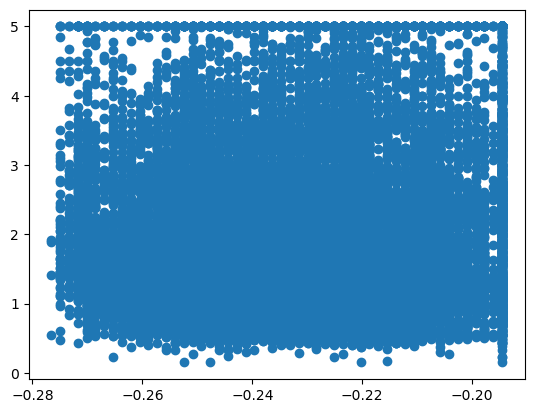

In [9]:
plt.scatter(x[:,1], y)

In [10]:
one = np.ones((x.shape[0], 1))

In [11]:
x = np.hstack((one, x))

In [12]:
x

array([[ 1.        , -0.26481882, -0.21225928, ..., -0.27409967,
        -0.21727801, -0.47482535],
       [ 1.        , -0.26485711, -0.24443058, ..., -0.27481663,
        -0.21731018, -0.47480927],
       [ 1.        , -0.26653645, -0.19456507, ..., -0.27370283,
        -0.21732626, -0.47484144],
       ...,
       [ 1.        , -0.27547589, -0.25086484, ..., -0.27446951,
        -0.21478473, -0.4732007 ],
       [ 1.        , -0.27520694, -0.24925628, ..., -0.27479513,
        -0.21478473, -0.47336156],
       [ 1.        , -0.27436823, -0.25247341, ..., -0.27400086,
        -0.21488124, -0.47323287]])

In [13]:
import numpy as np

def hypothesis(x, theta):
    y_ = 0
    n = len(theta)  # Corrected line
    
    for i in range(n):
        y_ += theta[i] * x[i]
    return y_

def cost(x, y, theta):
    m = len(y)  # Corrected line
    total_loss = 0
    
    for i in range(m):
        y_p = hypothesis(x[i], theta)
        y_gt = y[i]
        total_loss += (y_p - y_gt) ** 2
        
    return total_loss / m

def gradient(x, y, theta):
    m = len(y)  # Corrected line
    n = len(theta)  # Corrected line
    grad = np.zeros((n,))
    
    for i in range(n):
        for j in range(m):
            y_p = hypothesis(x[j], theta)
            y_gt = y[j]
            grad[i] += (y_p - y_gt) * x[j][i]
            
    return grad / m

def gradient_descent(x, y, learning_rate=0.3, epochs=1000):
    m, n = len(y), len(x[0])  # Corrected line
    theta = np.zeros((n,))
    cost_epoch = []
    
    for i in range(epochs):
        loss = cost(x, y, theta)
        grad = gradient(x, y, theta)
        cost_epoch.append(loss)
        
        for j in range(n):
            theta[j] = theta[j] - learning_rate * grad[j]
            
    return theta, cost_epoch


In [14]:
x_train = x[:20000]
y_train = y[:20000]
x_test = x[20000:]
y_test = y[20000:]

In [15]:
theta, cost_epoch = gradient_descent(x_train, y_train, learning_rate=0.03, epochs=10)

In [16]:
theta

array([ 0.35391655, -0.09553188, -0.08033483, -0.09512311, -0.09784324,
        0.407755  , -0.09703962, -0.07827926, -0.16664464])

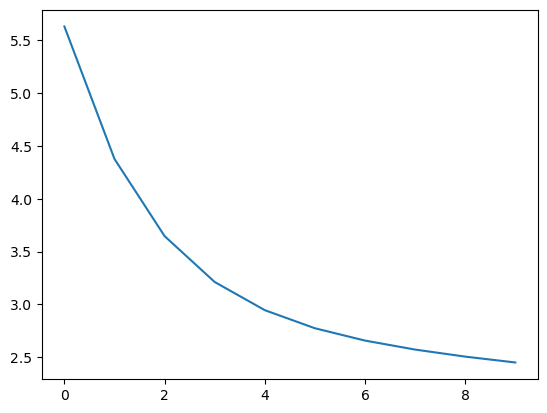

In [17]:
plt.plot(cost_epoch)

In [18]:
ones = np.ones((x.shape))

In [19]:
y_test_pred = []

for i in range(len(y_test)):
    y_p = hypothesis(x_test[i], theta)
    y_test_pred.append(y_p)
y_test_pred = np.array(y_test_pred)    
    

In [20]:
for i in range(len(y_test_pred)):
    print(y_test_pred[i],y_test[i])

0.83928988161673 [1.125]
0.7752040607929822 [1.125]
1.3901428656218795 [0.425]
1.3919808011563004 [0.713]
0.7257702731962652 [0.859]
1.4007802905914333 [0.409]
1.2118311029877373 [1.137]
1.2274673046855458 [0.955]
1.0200738805678948 [0.49]
1.462084519884021 [0.529]
1.5276167887395824 [0.415]
1.1575777779959895 [0.539]
1.0448380836896458 [0.621]
1.621220659416855 [0.798]
0.8018372412918262 [0.985]
1.1182404118348244 [1.034]
1.0300843967132876 [0.636]
1.3815344554119307 [0.729]
1.2737787212013754 [0.774]
1.6094565625681982 [0.992]
1.7159341768790233 [0.52]
1.3142421323851115 [0.721]
1.6337061679240863 [0.71]
1.3049508359446853 [0.762]
1.4433015147941624 [0.646]
1.2733174047210294 [0.629]
1.2372293137586077 [0.706]
1.2842466312957055 [0.886]
1.2168024108969668 [0.555]
1.4005214994951185 [0.677]
1.1433437544451777 [0.806]
1.1872552062007746 [0.78]
1.71193059609909 [0.776]
1.5484177570819053 [0.608]
0.9193142289996299 [0.531]
1.3306752379806912 [0.509]
1.5461709086155917 [0.9]
1.44136024894

In [28]:
def r2_score(y_t, y_p):
    num = np.sum((y_t - y_p)**2)
    den = np.sum((y_t - y_t.mean())**2)
    
    score = (1- num/den)
    return score

In [29]:
r2_score(y_test, y_test_pred)

-1144.8021994701057

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(f'Mean Squared error (MSE): = {mean_squared_error(y_test, y_test_pred)}')
print(f'Mean absolute error (MAE): = {mean_absolute_error(y_test, y_test_pred)}')
print(f'Root mean Squared error (RSME): = {np.sqrt(mean_squared_error(y_test, y_test_pred))}')

Mean Squared error (MSE): = 1.7802804397794545
Mean absolute error (MAE): = 0.9795964597340593
Root mean Squared error (RSME): = 1.3342715015241293
